# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Creating the Customer Dataframe

customer = pd.read_csv('Ecommerce Customers')

In [3]:
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# Further Describing the data: Mean, STD, Quartile

customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Data Analysis

1) We will try to relate the Avg time spent on Website or App againt the Yearly amount Spent

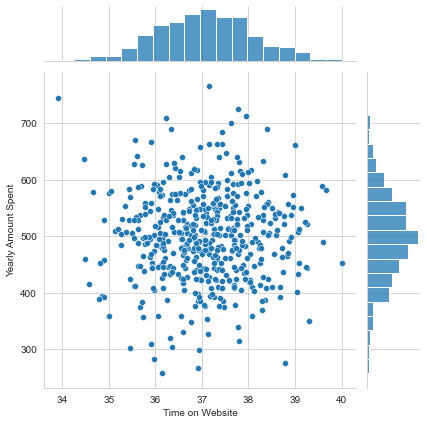

In [6]:
# Relation between Time spent on website vs yearly Amount Spent

sns.set_style('whitegrid')
sns.jointplot(data= customer, x='Time on Website', y='Yearly Amount Spent')

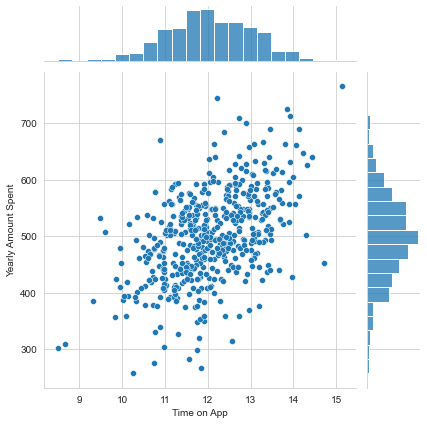

In [7]:
# Relation between Time spent on App vs yearly Amount Spent

sns.jointplot(data= customer, x='Time on App', y='Yearly Amount Spent')

# Relatable

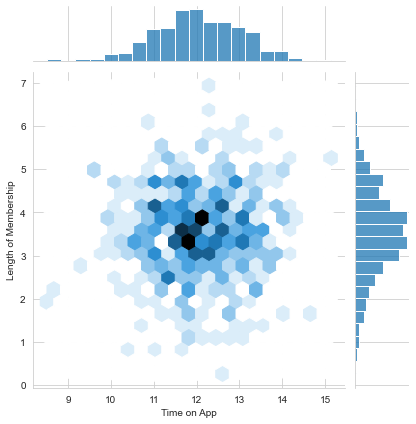

In [8]:
# Relation Between Time on App and Length of membership

sns.jointplot(data= customer, x='Time on App', y='Length of Membership', kind='hex')

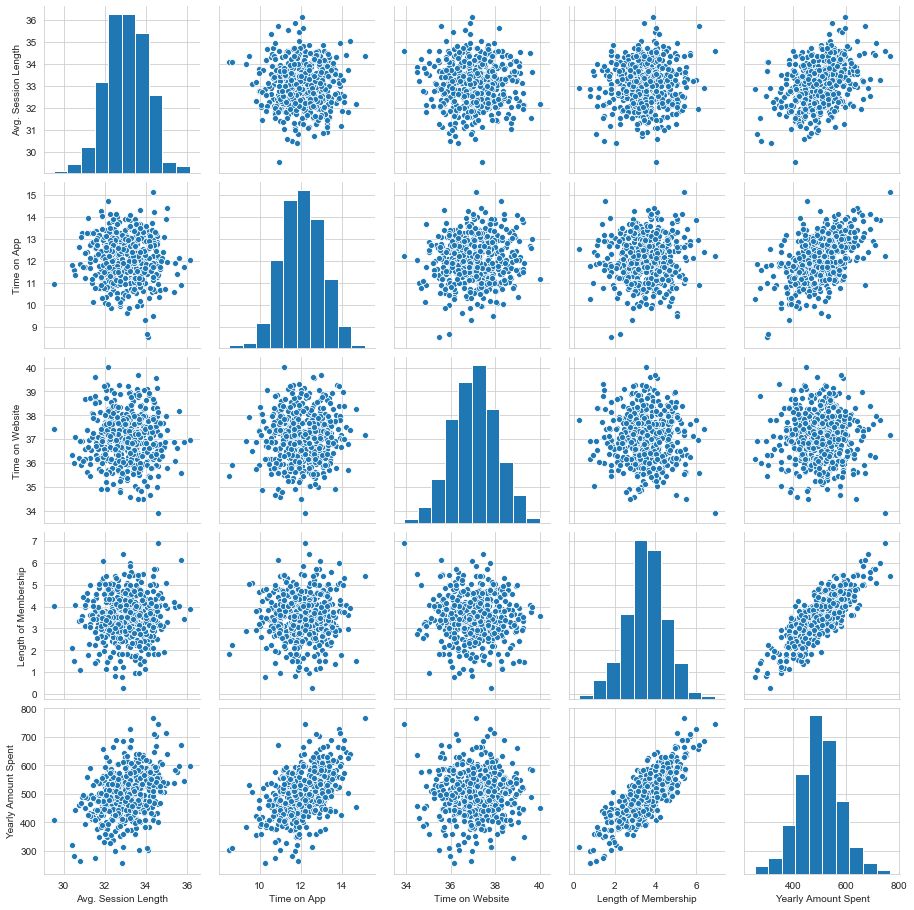

In [13]:
# Try Relate the relationship over entire Data

sns.pairplot(customer)

## Based on the Above Plot:
Length of the membership and yearly ampount spend are linearly realted.

We can also consider the realtionship between Time on App and yearly amount spent

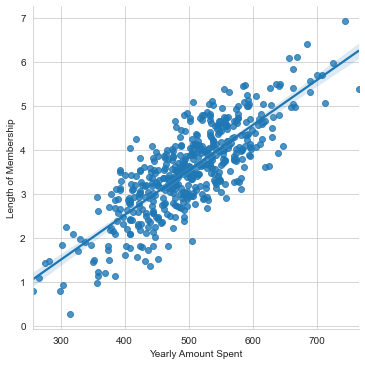

In [9]:
# Creating a linear model plot between yearly amount spent and length of membership

sns.lmplot(data= customer, x='Yearly Amount Spent', y='Length of Membership')

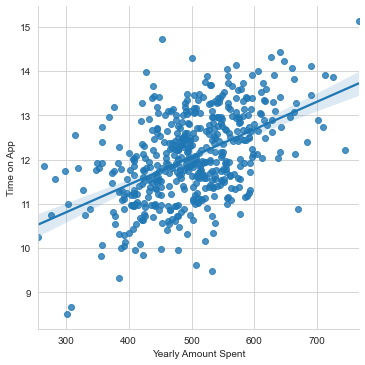

In [10]:
sns.lmplot(data= customer, x='Yearly Amount Spent', y='Time on App')

# Not good

## Training and Testing the Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [11]:
# We will try to build a model to predict the yearly amount spent by the customer.
# Target variable will be "Yearly Amount Spent" and rest all other attributes are in features.

In [12]:
customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
X = customer[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

Y = customer['Yearly Amount Spent']

In [14]:
# We Will Split the data into test and Train data set in 30:70 Ratio.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [17]:
# Training the Model

from sklearn.linear_model import LinearRegression

In [18]:
lm_ecom = LinearRegression()

In [19]:
lm_ecom.fit(X_train,Y_train)

LinearRegression()

In [20]:
lm_ecom.intercept_

-1047.9327822502385

In [21]:
lm_ecom.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [22]:
ecom_coef = pd.DataFrame(lm_ecom.coef_, index=[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']],columns=['Coeffiecient_Yearly Amount Spent'])

In [23]:
ecom_coef

,Coeffiecient_Yearly Amount Spent
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [24]:
predictions = lm_ecom.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

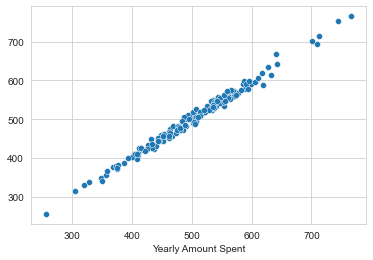

In [25]:
# Ploting the predicted result againt the actual result

sns.scatterplot(Y_test,predictions)

## Evaluating the Model¶
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


In [28]:
# Variance Score

metrics.explained_variance_score(Y_test, predictions)

0.9890771231889606

In [29]:
# Our model predicted 98% of the varriance

# Residuals

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

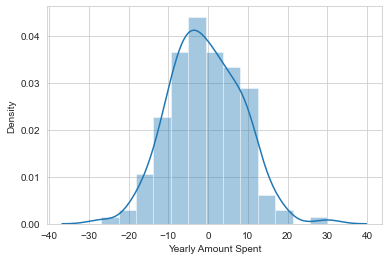

In [30]:
sns.distplot(Y_test - predictions)

## Do you think the company should focus more on their mobile app or on their website?

There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!